In [1]:
!pip install polyglot PyICU pycld2 morfessor
!pip install SpeechRecognition pydub simpleaudio
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 126 kB 15.2 MB/s 
     |████████████████████████████████| 255 kB 55.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 41.4 MB 1.2 MB/s 
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52580 sha256=91ab20027ec68552e3361a4998f4a7cf759052130312e9537357d6c52e1434e6
  Stored in directory: /root/.cache/pip/wheels/9f/5e/19/5d7096ca9d067df54509d4bd382332e1babeef05715a13ac39
  Created wheel for PyICU: filename=PyICU-2.10.2-cp38-cp38-linux_x86_64.whl size=1396839 sha256=7e1b5a05aa77a6366af2c0a833bf399ffd95463f9943bea48e42b295262ba82c
  Stored in directory: /root/.cache/pip/wheels/d8/30/74/41fd0a7e2e17f8f92d5a4584c2aad30d8235c8cfa63a13742f
  Created wheel for pycld2: filename=pycld2-0.41-cp38-cp38-linux_x8

In [1]:
import matplotlib.pyplot as plt, numpy as np, seaborn as sns, pandas as pd, re, nltk, itertools, spacy, speech_recognition as sr
nltk.download('punkt')
nltk.download("vader_lexicon")
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tree import Tree
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from polyglot.text import Text, Word
from polyglot.downloader import downloader
downloader.download("embeddings2.es")
downloader.download("ner2.es")
downloader.download("embeddings2.fr")
downloader.download("ner2.fr")
from collections import Counter, defaultdict
from string import punctuation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
!python -m spacy download de_core_news_sm
!python -m spacy download en_core_web_md
!python -m spacy download en_core_web_lg
from spacy.lang.en import English
from spacy.matcher import PhraseMatcher, Matcher
from spacy.tokens import Doc, Span
from spacy.language import Language
from spacy.pipeline import EntityRuler
from pydub import AudioSegment

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


[polyglot_data] Downloading package embeddings2.es to
[polyglot_data]     /root/polyglot_data...
[polyglot_data] Downloading package ner2.es to /root/polyglot_data...
[polyglot_data] Downloading package embeddings2.fr to
[polyglot_data]     /root/polyglot_data...
[polyglot_data] Downloading package ner2.fr to /root/polyglot_data...
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-12 08:41:31.013624: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.6 MB 12.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML

## ***Importing an audio file with Python***

You've seen how there are different kinds of audio files and how streaming music and spoken language have different sampling rates. But now we want to start working with these files.

To begin, we're going to import the `good_morning.wav` audio file using Python's in-built **`wave`** library. Then we'll see what it looks like in byte form using the built-in **`.readframes()`** method.

You can listen to `good_morning.wav` [here](https://assets.datacamp.com/production/repositories/4637/datasets/d30b8e2319792fb3e9d7ce1e469b15ecf3f75227/good-morning.wav).

Remember, `good_morning.wav` is only a few seconds long but at 48 kHz, that means it contains 48,000 pieces of information per second.

* Import the Python `wave` library.
* Read in the `good_morning.wav` audio file and save it to `good_morning`.
* Create `signal_gm` by reading all the frames from `good_morning` using `readframes()`.
* See what the first 10 frames of audio look like by slicing `signal_gm`.

In [ ]:
import wave

# Create audio file wave object
good_morning = wave.open('good_morning.wav', 'r')

# Read all frames from wave object 
signal_gm = good_morning.readframes(-1)

# View first 10
print(signal_gm[:10])

b'\xfd\xff\xfb\xff\xf8\xff\xf8\xff\xf7\xff'


# **Converting bytes to integers**

In [ ]:
import numpy as np

# Convert soundwave_gm from bytes to integers
soundwave_gm = np.frombuffer(signal_gm, dtype='int16')

# Show the first 10 items
soundwave_gm[:10]

array([ -3,  -5,  -8,  -8,  -9, -13,  -8, -10,  -9, -11], dtype=int16)

# **Finding the frame rate**

- $\text{Frequency (Hz)}$ = $\frac{\text{length of wave object array}}{\text{duration of audio file (seconds)}}$

In [ ]:
# Get the frame rate
framerate_gm = good_morning.getframerate()

# Show the frame rate
framerate_gm

48000

# **Finding sound wave timestamps**

In [ ]:
# Get the timestamps of the good morning sound wave
time_gm = np.linspace(start=0, # จุดเริ่มของไฟล์เสียง
                      stop=len(soundwave_gm)/framerate_gm, # ระยะเวลาของไฟล์เสียง
                      num=len(soundwave_gm)) 
time_gm[:10]

array([0.00000000e+00, 2.08334167e-05, 4.16668333e-05, 6.25002500e-05,
       8.33336667e-05, 1.04167083e-04, 1.25000500e-04, 1.45833917e-04,
       1.66667333e-04, 1.87500750e-04])

ตัวเลขใน array ข้างบน แสดงถึงช่วงเวลาเป็นวินาที เมื่อแต่ละ sound wave เกิดขึ้น

## ***Processing audio data with Python***

You've seen how a sound waves can be turned into numbers but what does all that conversion look like?

And how about another similar sound wave? One slightly different?

Use MatPlotLib to plot the sound wave of `good_morning` against `good_afternoon`.

To have the `good_morning` and `good_afternoon` sound waves on the same plot and distinguishable from each other, we'll use MatPlotLib's `alpha` parameter.

- Set the title to reflect the plot we are making.
- Add the `good_afternoon` time variable (`time_ga`) and amplitude variable (`soundwave_ga`) to the plot.
- Do the same with the good_morning time variable (`time_gm`) and amplitude variable (`soundwave_gm`) to the plot.
- Set the `alpha` variable to 0.5.

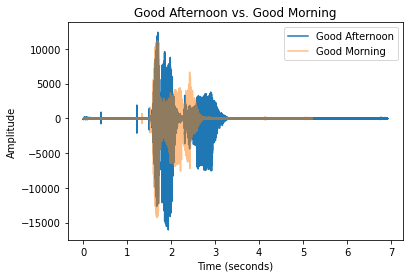

In [ ]:
good_afternoon = wave.open('good_afternoon.wav', 'r')
signal_ga = good_afternoon.readframes(-1)
soundwave_ga = np.frombuffer(signal_ga, dtype='int16')
framerate_ga = good_afternoon.getframerate()
time_ga = np.linspace(start=0, # จุดเริ่มของไฟล์เสียง
                      stop=len(soundwave_ga)/framerate_ga, # ระยะเวลาของไฟล์เสียง
                      num=len(soundwave_ga)) 

# Setup the title and axis titles
plt.title('Good Afternoon vs. Good Morning')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')

# Add the Good Afternoon data to the plot
plt.plot(time_ga, soundwave_ga, label='Good Afternoon')

# Add the Good Morning data to the plot
plt.plot(time_gm, soundwave_gm, label='Good Morning', alpha=0.5)
plt.legend()
plt.show()

Notice the two sound waves are very similar in the beginning. Because the first word is "good" in both audio files, they almost completely overlap. A well-built speech recognition system would recognize this and return the same first word for each wave. Let's build one to do just that.

# **Getting started with SpeechRecognition**

In [ ]:
!pip install SpeechRecognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 114 kB/s 


# **Using the Recognizer class**

In [ ]:
import speech_recognition as sr

# Create an instance of Recognizer
recognizer = sr.Recognizer()

# Set the energy threshold
recognizer.energy_threshold = 300 # ค่าต่ำกว่า 300 คือ ตีความเท่ากับไมมีเสียง

# **Recognize Speech**

In [ ]:
import speech_recognition as sr

recognizer = sr.Recognizer()

# Transcribe speech using Goole web API
recognizer.recognize_google(audio_data=audio_file, language="en-US")



```
Learning speech recognition on DataCamp is awesome!
```

## ***Using the Recognizer class***

Now you've created an instance of the **`Recognizer`** class we'll use the **`.recognize_google()`** method on it to access the Google web speech API and turn spoken language into text.

**`recognize_google()`** requires an argument `audio_data` otherwise it will return an error.

US English is the default language. If your audio file isn't in US English, you can change the language with the `language` argument. A list of language codes can be seen [here](https://cloud.google.com/speech-to-text/docs/languages).

An audio file containing English speech has been imported as `clean_support_call`. You can listen to the audio file [here](https://assets.datacamp.com/production/repositories/4637/datasets/393a2f76d057c906de27ec57ea655cb1dc999fce/clean-support-call.wav). SpeechRecognition has also been imported as `sr`.

To avoid hitting the API request limit of Google's web API, we've mocked the **`Recognizer`** class to work with our audio files. This means some functionality will be limited.


- Call the **`recognize_google()`** method on `recognizer` and pass it `clean_support_call`.
- Set the language argument to "en-US".

- *ขั้นตอนต่อไปนี้ ต้องใส่เพิ่มเข้ามาเองในการสร้างไฟล์เสียงที่ใช้กับ `.recognize_google()`*


```
sound = sr.AudioFile('clean_support_call.wav')
with sound as source:
    clean_support_call = recognizer.record(sound)
```






In [ ]:
import speech_recognition as sr

# Create a recognizer class
recognizer = sr.Recognizer()
sound = sr.AudioFile('clean_support_call.wav')
with sound as source:
    clean_support_call = recognizer.record(sound)

# Transcribe the support call audio
text = recognizer.recognize_google(audio_data=clean_support_call,
                                   language="en-US")

print(text)

result2:
{   'alternative': [   {   'confidence': 0.987629,
                           'transcript': "hello I'd like to get some help "
                                         'setting up my account please'}],
    'final': True}
hello I'd like to get some help setting up my account please


You just transcribed your first piece of audio using `speech_recognition`'s **`Recognizer`** class! Well, we've set it a mock version of **`Recognizer`** so we don't hit the API max requests limit. Notice how the `'hello'` wasn't seperate from the rest of the text. As powerful as **`recognize_google()`** is, it doesn't have sentence separation.

# **Reading audio files with SpeechRecognition**
## **The AudioFile class**



In [ ]:
import speech_recognition as sr

# Setup recognizer instance
recognizer = sr.Recognizer()

# Read in audio file
clean_support_call = sr.AudioFile("clean_support_call.wav")

# Check type of clean_support_call
type(clean_support_call)

speech_recognition.AudioFile

## **From `AudioFile` to `AudioData`**

In [ ]:
# Convert from AudioFile to AudioData
with clean_support_call as source:
    clean_support_call_audio = recognizer.record(source)

type(clean_support_call_audio)

speech_recognition.AudioData

## **Transcribing `AudioData`**

In [ ]:
recognizer.recognize_google(audio_data=clean_support_call_audio, language='en-US')

result2:
{   'alternative': [   {   'confidence': 0.987629,
                           'transcript': "hello I'd like to get some help "
                                         'setting up my account please'}],
    'final': True}


"hello I'd like to get some help setting up my account please"

## **Duration and offset**

In [ ]:
# Get first 1-second of clean support call
with clean_support_call as source:
    clean_support_call_audio = recognizer.record(source, duration=1.0)

recognizer.recognize_google(audio_data=clean_support_call_audio, language='en-US')

result2:
{   'alternative': [{'confidence': 0.98762906, 'transcript': 'hello'}],
    'final': True}


'hello'

## ***Recording the audio we need***

Sometimes you may not want the entire audio file you're working with. The `duration` and `offset` parameters of the **`.record()`** method can help with this.

After exploring your dataset, you find there's one file, imported as `nothing_at_end` which has [30-seconds of silence at the end](https://assets.datacamp.com/production/repositories/4637/datasets/ca799cf2a7b093c06e1a5ae1dd96a49d48d65efa/30-seconds-of-nothing-16k.wav) and a support call file, imported as `out_of_warranty` has [3-seconds of static at the front](https://assets.datacamp.com/production/repositories/4637/datasets/dbc47d8210fdf8de42b0da73d1c2ba92e883b2d2/static-out-of-warranty.wav).

Setting `duration` and `offset` means the **`.record()`** method will record up to `duration` audio starting at `offset`. They're both measured in seconds.

- Let's get the first 10-seconds of `nothing_at_end_audio`. To do this, you can set duration to 10.

In [ ]:
nothing_at_end = sr.AudioFile("30-seconds-of-nothing-16k.wav")

# Convert AudioFile to AudioData
with nothing_at_end as source:
    nothing_at_end_audio = recognizer.record(source, duration=10.0, offset=None)

# Transcribe AudioData to text
text = recognizer.recognize_google(nothing_at_end_audio, language="en-US")

print(text)


result2:
{   'alternative': [   {   'confidence': 0.88164651,
                           'transcript': 'this ODI fall has 30 seconds of '
                                         'nothing at the end of it'},
                       {   'transcript': 'this audio fall has 30 seconds of '
                                         'nothing at the end of it'},
                       {   'transcript': 'this audiophile has 30 seconds of '
                                         'nothing at the end of it'},
                       {   'transcript': 'this ODI fall has thirty seconds of '
                                         'nothing at the end of it'},
                       {   'transcript': 'this audio file has 30 seconds of '
                                         'nothing at the end of it'}],
    'final': True}
this ODI fall has 30 seconds of nothing at the end of it


- Let's remove the first 3-seconds of static of `static_at_start` by setting `offset` to 3.

In [ ]:
static_at_start = sr.AudioFile("static-out-of-warranty.wav")

# Convert AudioFile to AudioData
with static_at_start as source:
    static_art_start_audio = recognizer.record(source,duration=None,offset=3.0)

# Transcribe AudioData to text
text = recognizer.recognize_google(static_art_start_audio, language='en-US')

print(text)

result2:
{   'alternative': [   {   'confidence': 0.94255513,
                           'transcript': "hello I'd like to get some help with "
                                         "my device please I think it's out of "
                                         'warranty I bought it about 2 years '
                                         'ago'},
                       {   'transcript': "hello I'd like to get some help with "
                                         "my device please I think it's out of "
                                         'warranty I bought it about two years '
                                         'ago'},
                       {   'transcript': "hello I'd like to get some help with "
                                         "my device please I think it's "
                                         'out-of-warranty I bought it about 2 '
                                         'years ago'},
                       {   'transcript': "hello I'd like to get so

Speech recognition can be resource intensive, so in practice, you'll want to explore your audio files to make you're not wasting any computing power trying to transcribe static or silence.

# **Non-speech audio**



In [ ]:
import speech_recognition as sr

leopard_roar = sr.AudioFile("leopard_roar.wav")
with leopard_roar as source:
    leopard_roar_audio = recognizer.record(source)
recognizer.recognize_google(leopard_roar_audio)



```
UnknownValueError:
```



# **Showing all**

In [ ]:
# Recognizing Japanese audio with show_all=True
text = recognizer.recognize_google(japanese_good_morning, language="en-US",
                                   show_all=True)
print(text)



```
{'alternative': [{'transcript': 'Ohio gozaimasu', 'confidence': 0.89041114},
{'transcript': 'all hail gozaimasu'},
{'transcript': 'ohayo gozaimasu'},
{'transcript': 'olho gozaimasu'},
{'transcript': 'all Hale gozaimasu'}],
'final': True}
```

# **Multiple speakers**

-  manually split the audio file into different speakers



In [ ]:
# Import audio files separately
speakers = [sr.AudioFile("s0.wav"), sr.AudioFile("s1.wav"), sr.AudioFile("s2.wav")]

# Transcribe each speaker individually
for i, speaker in enumerate(speakers):
    with speaker as source:
        speaker_audio = recognizer.record(source)
    print(f"Text from speaker {i}: {recognizer.recognize_google(speaker_audio)}")



```
Text from speaker 0: one of the limitations of the speech recognition library
Text from speaker 1: is that it doesn't recognise different speakers and voices
Text from speaker 2: it will just return it all as one block a text
```

# **Noisy audio**

- If you have trouble hearing the speech, so will the APIs



In [ ]:
# Import audio file with background nosie
noisy_support_call = sr.AudioFile('noisy_support_call.wav')

with noisy_support_call as source:
    # Adjust for ambient noise and record
    recognizer.adjust_for_ambient_noise(source, duration=0.5)
    noisy_support_call_audio = recognizer.record(source)
    
# Recognize the audio
recognizer.recognize_google(noisy_support_call_audio)

## ***Different languages***

Now you've seen an example of how the **`Recognizer`** class works. Let's try a few more. How about speech from a different language?

What do you think will happen when we call the **`recognize_google()`** function on a[ Japanese version of good_morning.wav](https://assets.datacamp.com/production/repositories/4637/datasets/cd9b801670d0664275cdbd3a24b6b70a8c2e5222/good-morning-japanense.wav) (japanese_audio)?

The default language is `"en-US"`, are the results the same with the `"ja"` tag?

How about non-speech audio? Like this leopard roaring ([leopard_audio](https://assets.datacamp.com/production/repositories/4637/datasets/5720832b2735089d8e735cac3e0b0ad9b5114864/leopard.wav).

Or speech where the sounds may not be real words, such as a [baby talking](https://assets.datacamp.com/production/repositories/4637/datasets/e9fd46a06d74431e3baa942c489e1b119d85a233/charlie-bit-me-5.wav) (`charlie_audio`)?

To familiarize more with the **`Recognizer`** class, we'll look at an example of each of these.

In [ ]:
import speech_recognition as sr

ohaiyo = sr.AudioFile('good-morning-japanense.wav')

recognizer = sr.Recognizer()

with ohaiyo as source:
    japanese_audio = recognizer.record(source)

# Pass the Japanese audio to recognize_google
text = recognizer.recognize_google(japanese_audio, language="en-US")

# Print the text
print(text)

result2:
{   'alternative': [   {   'confidence': 0.98762906,
                           'transcript': 'ohayo gozaimasu'}],
    'final': True}
ohayo gozaimasu


- Pass the same Japanese audio (`japanese_audio`) using `"ja"` as the language parameter. Do you see a difference?

In [ ]:
# Pass the Japanese audio to recognize_google
text = recognizer.recognize_google(japanese_audio, language='ja')

# Print the text
print(text)

result2:
{   'alternative': [   {'confidence': 0.9111861, 'transcript': 'おはようございます'},
                       {'transcript': 'あおはようございます'},
                       {'transcript': 'おはようございまーす'},
                       {'transcript': 'あおはようございまーす'}],
    'final': True}
おはようございます


- What about about non-speech audio? Pass `leopard_audio` to **`recognize_google()`** with `show_all` as True.

In [ ]:
roar = sr.AudioFile('leopard.wav')

with roar as source:
    leopard_audio = recognizer.record(source)

# Pass the leopard roar audio to recognize_google
text = recognizer.recognize_google(leopard_audio, 
                                   language="en-US", 
                                   show_all=True)

# Print the text
print(text)

[]


- What if your speech files have non-audible human sounds? Pass `charlie_audio` to **`recognize_google()`** to find out.

In [ ]:
baby = sr.AudioFile('charlie-bit-me-5.wav')

with baby as source:
    charlie_audio = recognizer.record(source)

# Pass charlie_audio to recognize_google
text = recognizer.recognize_google(charlie_audio, 
                                   language="en-US")

# Print the text
print(text)

result2:
{   'alternative': [   {   'confidence': 0.34498742,
                           'transcript': 'charlie bit me'},
                       {'transcript': 'Charlie Batman'},
                       {'transcript': 'Batman'},
                       {'transcript': 'surely Batman'},
                       {'transcript': 'Jolly Batman'}],
    'final': True}
charlie bit me


## ***Import an audio file with PyDub***

`PyDub`'s `AudioSegment` class makes it easy to import and manipulate audio files with Python.

In this exercise, we'll import an audio file of interest by creating an instance of **`AudioSegment`**.

To import an audio file, you can use the **`from_file()`** function on **`AudioSegment`** and pass it your target audio file's pathname as a string. The `format` parameter gives you an option to specify the format of your audio file, however, this is optional as **`PyDub`** will automatically infer it.

**`PyDub`** works with `.wav` files without any extra dependencies but for other file types like `.mp3`, you'll need to install **`ffmpeg`**.

A sample audio file has been setup as `wav_file.wav`, you can listen to it [here](https://assets.datacamp.com/production/repositories/4637/datasets/6238f8088db33efb5d103dfac1e42eb9fe3e6f2b/wav_file.wav).


- Import **`AudioSegment`** from **`pydub`**.
- Call the **`from_file`** method and pass it the audio file pathname.

In [ ]:
# Import AudioSegment from Pydub
from pydub import AudioSegment

# Create an AudioSegment instance
wav_file = AudioSegment.from_file(file='wav_file.wav', format="wav")

# Check the type
print(type(wav_file))

<class 'pydub.audio_segment.AudioSegment'>


## ***Play an audio file with PyDub***

If you're working with audio files, chances are you want to listen to them.

**`PyDub`**'s **`playback`** module provides a function called **`play()`** which can be passed an **`AudioSegment`**. Running the **`play()`** function with an **`AudioSegment`** passed in will play the **`AudioSegment`** out loud.

This can be helpful to check the quality of your audio files and assess any changes you need to make.

Remember: to use the **`play()`** function, you'll need **`simpleaudio`** or **`pyaudio`** installed for `.wav` files and **`ffmpeg`** for other kinds of files.


- Import `play` from the **`pydub.playback`** module.
- Call **`play()`** whilst passing it the `wav_file` **`AudioSegment`**.

In [ ]:
# Import AudioSegment and play
import simpleaudio
from pydub import AudioSegment
from pydub.playback import play

# Create an AudioSegment instance
wav_file = AudioSegment.from_file(file="wav_file.wav", format="wav")

# Play the audio file
play(wav_file)

SimpleaudioError: ignored

## ***Audio parameters with PyDub***

Every audio file you work with will have a number of characteristics associated with them, such as, channels, frame rate (or sample rate), sample width and more.

Knowing these parameters is useful to ensure your audio files are compatible with various API requirements for speech transcription.

For example, many APIs recommend a minimum frame rate (`wav_file.frame_rate`) of 16,000 Hz.

When you create an instance of **`AudioSegment`**, **`PyDub`** automatically infers these parameters from your audio files and saves them as attributes.

In this exercise, we'll explore these attributes.

- Find the `frame_rate` of `wav_file`.

- Find the number of channels of `wav_file`.

- Find the max amplitude of `wav_file`.

- Find the length of `wav_file` in milliseconds.

In [ ]:
# Import audio file
wav_file = AudioSegment.from_file(file="wav_file.wav")

# Find the frame rate
print(wav_file.frame_rate)

# Find the number of channels
print(wav_file.channels)

# Find the max amplitude
print(wav_file.max)

# Find the length
print(len(wav_file))

48000
2
8484
3284


## ***Adjusting audio parameters***

During your exploratory data analysis, you may find some of the parameters of your audio files differ or are incompatible with speech recognition APIs.

Don't worry, **`PyDub`** has built-in functionality which allows you to change various attributes.

For example, you can set the frame rate of your audio file calling **`set_frame_rate()`** on your **`AudioSegment`** instance and passing it an integer of the desired frame rate measured in Hertz.

- Create a new `wav_file` with a frame rate of 16,000 Hz and then check its frame rate.

- Set the `wav_file` number of channels to 1 and then check the number of channels.


- Print the sample width of` wav_file` and then set it to 1 and print it again.

In [ ]:
# Import audio file
wav_file = AudioSegment.from_file(file="wav_file.wav")

# Create a new wav file with adjusted frame rate
wav_file_16k = wav_file.set_frame_rate(16000)

# Check the frame rate of the new wav file
print(wav_file_16k.frame_rate)


# Set number of channels to 1
wav_file_1_ch = wav_file.set_channels(1)

# Check the number of channels
print(wav_file_1_ch.channels)

# Print sample_width
print(f"Old sample width: {wav_file.sample_width}")

# Set sample_width to 1
wav_file_sw_1 = wav_file.set_sample_width(1)

# Check new sample_width
print(f"New sample width: {wav_file_sw_1.sample_width}")

16000
1
Old sample width: 2
New sample width: 1


## ***Turning it down... then up***

Speech recognition works best on clean, audible speech. If your audio files are too quiet or too loud, it can hinder transcription.

In this exercise, you'll see how to make an **`AudioSegment`** quieter or louder.

Since the play() function won't play your changes in the DataCamp classroom.

The baseline audio file, `volume_adjusted.wav` can be heard [here](https://assets.datacamp.com/production/repositories/4637/datasets/520b312f96433535f93656d9e6d61fdb10f5c517/volume_adjusted.wav).


- Import `volume_adjusted.wav` and lower its volume by 60 dB and save it to a new variable `quiet_volume_adjusted`.

- Import the target audio file, increase its volume by 15 dB and save it to the variable `louder_volume_adjusted`.

In [ ]:
from pydub import AudioSegment

# Import audio file
volume_adjusted = AudioSegment.from_file('volume_adjusted.wav')

# Lower the volume by 60 dB
quiet_volume_adjusted = volume_adjusted - 60

# Increase the volume by 15 dB
louder_volume_adjusted = volume_adjusted + 15

## ***Normalizing an audio file with PyDub***

Sometimes you'll have audio files where the speech is loud in some portions and quiet in others. Having this variance in volume can hinder transcription.

Luckily, **`PyDub`**'s effects module has a function called **`normalize()`** which finds the maximum volume of an **`AudioSegment`**, then adjusts the rest of the **`AudioSegment`** to be in proportion. This means the quiet parts will get a volume boost.

You can listen to an example of an audio file which starts as loud then goes quiet, `loud_then_quiet.wav`, [here](https://assets.datacamp.com/production/repositories/4637/datasets/9251c751d3efccf781f3e189d68b37c8d22be9ca/ex3_datacamp_loud_then_quiet.wav).

Use **`normalize()`** to normalize the volume of our file, making it sound more like this.

- Import **`AudioSegment`** from **`PyDub`** and **`normalize`** from the **`PyDub`**'s effects module.

- Import the target audio file, `loud_then_quiet.wav` and save it to `loud_then_quiet`.

- Normalize the imported audio file using the **`normalize()`** function and save it to `normalized_loud_then_quiet`.

In [ ]:
from pydub import AudioSegment
from pydub.effects import normalize

# Import target audio file
loud_then_quiet = AudioSegment.from_file('loud_then_quiet.wav')

# Normalize target audio file
normalized_loud_then_quiet = normalize(loud_then_quiet)

## ***Chopping and changing audio files***

Some of your audio files may have sections of redundancy. For example, you might find at the beginning of each file, there's a few seconds of static.

Instead of trying to transcribe static, you can remove it.

Since an **`AudioSegment`** is iterable, and measured in milliseconds, you can use slicing to alter the length.

To get the first 3-seconds of `wav_file`, you'd use `wav_file[:3000]`.

You can also add two **`AudioSegment`**'s together using the addition operator. This is helpful if you need to combine several audio files.

To practice both of these, we're going to remove the first four seconds of [`part1.wav`](https://assets.datacamp.com/production/repositories/4637/datasets/6ef2e43497070fd23c6ce4c0fe1d9d0e46469750/ex3_slicing_part_1.wav), and add the remainder to [`part2.wav`](https://assets.datacamp.com/production/repositories/4637/datasets/3b47eb5ca2c696e816af04053150d96fd95b4c7f/ex3_slicing_part_2.wav). Leaving the end result sounding like [part_3.wav](https://assets.datacamp.com/production/repositories/4637/datasets/3803042506ed07d707fe264d0bc6ec6ffa891e63/ex3_slicing_part_3.wav).


- Import `part_1.wav` and `part_2.wav` and save them to `part_1` and `part_2` respectively.
- Remove the first 4-seconds of `part_1` using slicing and save the new audio to `part_1_removed`.
- Add `part_1_removed` to `part_2` and save it to `part_3`.



In [ ]:
from pydub import AudioSegment

# Import part 1 and part 2 audio files
part_1 = AudioSegment.from_file('part_1.wav')
part_2 = AudioSegment.from_file('part_2.wav')

# Remove the first four seconds of part 1
part_1_removed = part_1[4000:]

# Add the remainder of part 1 and part 2 together
part_3 = part_1_removed + part_2

## ***Splitting stereo audio to mono with PyDub***

If you're trying to transcribe phone calls, there's a chance they've been recorded in stereo format, with one speaker on each channel.

As you've seen, it's hard to transcribe an audio file with more than one speaker. One solution is to split the audio file with multiple speakers into single files with individual speakers.

**`PyDub`**'s **`split_to_mono()`** function can help with this. When called on an **`AudioSegment`** recorded in stereo, it returns a list of two separate **`AudioSegment`**'s in mono format, one for each channel.

In this exercise, you'll practice this by splitting this [stereo phone call](https://assets.datacamp.com/production/repositories/4637/datasets/810bb65e2e681e086e90bc2c6c2372bc4bd2cb52/ex3_stereo_call.wav) (`stereo_phone_call.wav`) recording into [channel 1](https://assets.datacamp.com/production/repositories/4637/datasets/0aa876f5cb924035481d7b786a3701624e86d1e7/ex3_stereo_call_channel_1.wav) and [channel 2](https://assets.datacamp.com/production/repositories/4637/datasets/2a16db969efc35186fe25ca45a4dbd506318a1cd/ex3_stereo_call_channel_2.wav). This separates the two speakers, allowing for easier transcription.

- Import **`AudioSegment`** from **`pydub`**.
- Create an **`AudioSegment`** instance `stereo_phone_call` with `stereo_phone_call.wav`.
- Split `stereo_phone_call` into channels using **`split_to_mono()`** and check the channels of the resulting output.
- Save each channel to new variables, `phone_call_channel_1` and `phone_call_channel_2`.

In [ ]:
# Import AudioSegment
from pydub import AudioSegment

# Import stereo audio file and check channels
stereo_phone_call = AudioSegment.from_file('stereo_phone_call.wav')
print(f"Stereo number channels: {stereo_phone_call.channels}")

# Split stereo phone call and check channels
channels = stereo_phone_call.split_to_mono()
print(f"Split number channels: {channels[0].channels}, {channels[1].channels}")

# Save new channels separately
phone_call_channel_1 = channels[0]
phone_call_channel_2 = channels[1]

Stereo number channels: 2
Split number channels: 1, 1


Having audio files with only one speaker usually results in better quality transcriptions.

## ***Exporting and reformatting audio files***

If you've made some changes to your audio files, or if they've got the wrong file extension, you can use **`PyDub`** to export and save them as new audio files.

You can do this by using the **`.export()`** function on any instance of an **`AudioSegment`** you've created. The **`export()`** function takes two parameters, `out_f`, or the destination file path of your audio file and format, the format you'd like your new audio file to be. Both of these are strings. format is `"mp3"` by default so be sure to change it if you need.

Import [this](https://assets.datacamp.com/production/repositories/4637/datasets/b035eadbae1544450868436a7179fa70158eb5de/mp3_file.mp3) `.mp3` file (`mp3_file.mp3`) and then export it with the `.wav` extension using **`.export()`**.

Remember, to work with files other than `.wav`, you'll need **`ffmpeg`**.

- Import `mp3_file.mp3` and save it to `mp3_file`.
- Export `mp3_file` with the file name `mp3_file.wav` with `"wav"` format.

In [ ]:
from pydub import AudioSegment

# Import the .mp3 file
mp3_file = AudioSegment.from_file('mp3_file.mp3')

# Export the .mp3 file as wav
mp3_file.export(out_f='mp3_file.wav', format='wav')

<_io.BufferedRandom name='mp3_file.wav'>

## ***Manipulating multiple audio files with PyDub***

You've seen how to convert a single file using PyDub but what if you had a folder with multiple different file types?

For this exercise, we've setup a folder which has `.mp3`, `.m4a` and `.aac` versions of the `good-afternoon` audio file.

We'll use PyDub to open each of the files and export them as `.wav` format so they're compatible with speech recognition APIs.

- Pass `audio_file` to the **`from_file()`** function.
- Use **`export()`** to export `wav_filename` with the format `"wav"`.

In [ ]:
import os

# Loop through the files in the folder
for audio_file in os.listdir('/content'):

    if (str(audio_file)[0] != '.') :
    
        # Create the new .wav filename
        wav_filename = os.path.splitext(os.path.basename(audio_file))[0] + ".wav"
            
        # Read audio_file and export it in wav format
        AudioSegment.from_file(audio_file).export(out_f=wav_filename, format='wav')
            
        print(f"Creating {wav_filename}...")

Creating volume_adjusted.wav...
Creating mp3_file.wav...
Creating part_2.wav...
Creating mp3_file.wav...
Creating stereo_phone_call.wav...
Creating part_3.wav...
Creating loud_then_quiet.wav...
Creating part_1.wav...


## ***An audio processing workflow***

You've seen how to import and manipulate a single audio file using PyDub. But what if you had a folder with multiple audio files you needed to convert?

Use PyDub to format a folder of files to be ready to use with **`speech_recognition`**.

You've found your customer call files all have 3-seconds of static at the start and are quieter than they could be.

To fix this, we'll use PyDub to cut the static, increase the sound level and convert them to the `.wav` extension.

You can listen to an unformatted example [here](https://assets.datacamp.com/production/repositories/4637/datasets/c53557fea60087064aec7e9d99e889b9be79e75a/ex3-static-help-with-account.mp3).


- Let's start with one file. Import `account_help.mp3` and cut off the first 3-seconds (3000 milliseconds) of static.

- Increase the volume by 10dB.



In [ ]:
file_with_static = AudioSegment.from_file("account_help.mp3")

# Cut the 3-seconds of static off
file_without_static = file_with_static[3000:]

# Increase the volume by 10dB
louder_file_without_static = file_without_static + 10

- Now for multiple files. Use **`from_file()`** to import each `audio_file` and export the louder files without static with the `"wav"` format.

In [ ]:
for audio_file in folder:
    file_with_static = AudioSegment.from_file(audio_file)

    # Cut the 3-seconds of static off
    file_without_static = file_with_static[3000:]

    # Increase the volume by 10dB
    louder_file_without_static = file_without_static + 10
    
    # Create the .wav filename for export
    wav_filename = os.path.splitext(os.path.basename(audio_file))[0] + ".wav"
    
    # Export the louder file without static as .wav
    louder_file_without_static.export(wav_filename, format='wav')
    print(f"Creating {wav_filename}...")

## ***Converting audio to the right format***

Acme Studios have asked you to do a proof of concept to find out more about their audio files.

After exploring them briefly, you find there's a few calls but they're in the wrong file format for transcription.

As you'll be interacting with many audio files, you decide to begin by creating some helper functions.

The first one, `convert_to_wav(filename)` takes a file path and uses `PyDub` to convert it from a non-wav format to `.wav` format.

Once it's built, we'll use the function to convert [Acme's first call](https://assets.datacamp.com/production/repositories/4637/datasets/83ef1650407e911a0f52f491068e3082661db743/ex4_call_1_stereo_mp3.mp3), `call_1.mp3`, from `.mp3` format to `.wav`.

**`PyDub`**'s **`AudioSegment`** class has already been imported. Remember, to work with non-wav files, you'll need **[`ffmpeg](http://www.ffmpeg.org/)`**.

- Import the filename parameter using **`AudioSegment`**'s **`from_file()`**.
- Set the export format to `"wav"`.
- Pass the target audio file, `call_1.mp3`, to the function.

In [ ]:
from pydub import AudioSegment

# Create function to convert audio file to wav
def convert_to_wav(filename):
    """Takes an audio file of non .wav format and converts to .wav"""
    # Import audio file
    audio = AudioSegment.from_file(filename)
    
    # Create new filename
    new_filename = filename.split(".")[0] + ".wav"
    
    # Export file as .wav
    audio.export(new_filename, format='wav')
    print(f"Converting {filename} to {new_filename}...")
 
# Test the function
convert_to_wav('call_1.mp3')

Converting call_1.mp3 to call_1.wav...


## ***Finding PyDub stats***

You decide it'll be helpful to know the audio attributes of any given file easily. This will be especially helpful for finding out how many channels an audio file has or if the frame rate is adequate for transcription.

Create `show_pydub_stats()` which takes a filename of an audio file as input. It then imports the audio as a **`PyDub`** **`AudioSegment`** instance and prints attributes such as number of channels, length and more.

It then returns the **`AudioSegment`** instance so it can be used later on.

We'll use our function on the newly converted `.wav` file, `call_1.wav`

- Create an **`AudioSegment`** instance called `audio_segment` by importing the filename parameter.

- Print the number of channels using the **`channels`** attribute.
- Return the `audio_segment` variable.
- Test the function on `"call_1.wav"`.

In [ ]:
def show_pydub_stats(filename):
    """Returns different audio attributes related to an audio file."""
    # Create AudioSegment instance
    audio_segment = AudioSegment.from_file(filename)
    
    # Print audio attributes and return AudioSegment instance
    print(f"Channels: {audio_segment.channels}")
    print(f"Sample width: {audio_segment.sample_width}")
    print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
    print(f"Frame width: {audio_segment.frame_width}")
    print(f"Length (ms): {len(audio_segment)}")
    return audio_segment

# Try the function
call_1_audio_segment = show_pydub_stats('call_1.wav')

Channels: 1
Sample width: 2
Frame rate (sample rate): 32000
Frame width: 2
Length (ms): 54888


## ***Transcribing audio with one line***

Alright, now you've got functions to convert audio files and find out their attributes, it's time to build one to transcribe them.

Build `transcribe_audio()` which takes a `filename` as input, imports the `filename` using **`speech_recognition`**'s **`AudioFile`** class and then transcribes it using **`.recognize_google()`**.

- Define a function called `transcribe_audio` which takes `filename` as an input parameter.
- Setup a **`sr.Recognizer()`** instance as `recognizer`.
- Use **`.recognize_google()`** to transcribe the audio data.
- Pass the target call to the function.

In [ ]:
def transcribe_audio(filename):
    """Takes a .wav format audio file and transcribes it to text."""
    # Setup a recognizer instance
    recognizer = sr.Recognizer()
    
    # Import the audio file and convert to audio data
    audio_file = sr.AudioFile(filename)
    with audio_file as source:
        audio_data = recognizer.record(source)
    
    # Return the transcribed text
    return recognizer.recognize_google(audio_data)

# Test the function
print(transcribe_audio('call_1.wav'))

result2:
{   'alternative': [   {   'confidence': 0.72915477,
                           'transcript': 'hello welcome to Acme Studio support '
                                         'lawn my name is Daniel how can I '
                                         'best help you hey Daniel this is '
                                         'John Audrey'},
                       {   'transcript': 'hello welcome to Acme Studio support '
                                         'line my name is Daniel how can I '
                                         'best help you hey Daniel this is '
                                         'John Audrey'},
                       {   'transcript': 'hello welcome to Acme Studio support '
                                         'lawn my name is Daniel how can I '
                                         'best help you hey Daniel this is '
                                         'John'},
                       {   'transcript': 'hello welcome to Acme Studi

- *ทำไม ถอดความออกมาได้สั้นนิดเดียว ???*


```
hello welcome to Acme studio support line my name is Daniel how can I best help you hey Daniel this is John I've recently bought a smart from you guys 3 weeks ago and I'm already having issues with it I know that's not good to hear John let's let's get your cell number and then we can we can set up a way to fix it for you one number for 17 varies how long do you reckon this is going to try our best to get the steel number will start up this support case I'm just really really really really I've been trying to contact past three 4 days now and I've been put on hold more than an hour and a half so I'm not really happy I kind of wanna get this issue 6 is f***** possible
```



## ***Using the helper functions you've built***

Okay, now we've got some helper functions ready to go, it's time to put them to use!

You'll first use `convert_to_wav()` to convert Acme's [`call_2.mp3`](https://assets.datacamp.com/production/repositories/4637/datasets/56f523fb855eaecc14a87c5619ec5e6e7c4490bc/ex4_call_1_stereo_formatted_mp3.mp3) to `.wav` format and save it as `call_2.wav`

Using `show_pydub_stats()` you find `call_2.wav` has 2 channels so you decide to split them using **`PyDub`**'s **`split_to_mono()`**. Acme tells you the [customer channel](https://assets.datacamp.com/production/repositories/4637/datasets/03ace2e9b866aaa554c465d6698500aaf48599dc/ex4_call_1_channel_2_split.wav) is likely channel 2. So you export channel 2 using **`PyDub's .export()`**.

Finally, you'll use `transcribe_audio()` to transcribe channel 2 only.

- Convert the `.mp3` version of `call_2` to `.wav` and then check the stats of the `.wav` version.
- Split `call_2` to mono and then export the second channel in `.wav` format.
- Transcribe the audio of call 1's channel 2.

In [ ]:
# Convert mp3 file to wav
convert_to_wav("call_2.mp3")

# Check the stats of new file
call_2 = show_pydub_stats("call_2.wav")

# Split call_1 to mono
call_2_split = call_2.split_to_mono()

# Export channel 2 (the customer channel)
call_2_split[1].export("call_2_channel_2.wav", format="wav")

# Transcribe the single channel
print(transcribe_audio('call_1_channel_2.wav'))

Converting call_2.mp3 to call_2.wav...
Channels: 2
Sample width: 2
Frame rate (sample rate): 32000
Frame width: 4
Length (ms): 54888
result2:
{   'alternative': [   {   'confidence': 0.72915483,
                           'transcript': 'hello welcome to Acme Studio support '
                                         'lawn my name is Daniel how can I '
                                         'best help you hey Daniel this is '
                                         'John Audrey'},
                       {   'transcript': 'hello welcome to Acme Studio support '
                                         'line my name is Daniel how can I '
                                         'best help you hey Daniel this is '
                                         'John Audrey'},
                       {   'transcript': 'hello welcome to Acme Studio support '
                                         'lawn my name is Daniel how can I '
                                         'best help you hey Dan

- *ยังคงถอดความได้ไม่ครบเหมือนเดิม ?*

## ***Analyzing sentiment of a phone call***

Once you've transcribed the text from an audio file, it's possible to perform natural language processing on the text.

Use NLTK's VADER (Valence Aware Dictionary and sEntiment Reasoner) to analyze the sentiment of the transcribed text of `call_2.wav`.

To transcribe the text, we'll use the `transcribe_audio()` function we created earlier.

Once we have the text, we'll use NLTK's **`SentimentIntensityAnalyzer()`** class to obtain a sentiment polarity score.

**`.polarity_scores(text)`** returns a value for pos (positive), neu (neutral), neg (negative) and compound. Compound is a mixture of the other three values. The higher it is, the more positive the text. Lower means more negative.


- Instantiate an instance of **`SentimentIntensityAnalyzer()`** and save it to the variable `sid`.
- Transcribe the target call and save it to `call_2_text`.
- Print the **`polarity_scores()`** of `call_2_text`.

In [2]:
def transcribe_audio(filename):
    
    """
    Takes an audio filename as string and transcribes the text within it.
    Note: For this exercise, the function has been mocked to prevent hitting the API usage limit.
    """

    if type(filename) == str:
        return "hello my name is Daniel thank you for calling acne Studios how can I best help you a little bit more but I'm corner of Edward and Elizabeth according to Google according to the match but would you be able to help me in some way because I think I'm actually walk straight past your shop yeah sure thing or thank you so it's good to hear you're enjoying it let me find out where the nearest store is for you"
    else:
        raise TypeError("filename should be of type string, like: 'call_2.wav'")

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create SentimentIntensityAnalyzer instance
sid = SentimentIntensityAnalyzer()

# Let's try it on one of our phone calls
call_2_text = transcribe_audio('call_2.wav')

# Display text and sentiment polarity scores
print(call_2_text)
print(sid.polarity_scores(call_2_text))

hello my name is Daniel thank you for calling acne Studios how can I best help you a little bit more but I'm corner of Edward and Elizabeth according to Google according to the match but would you be able to help me in some way because I think I'm actually walk straight past your shop yeah sure thing or thank you so it's good to hear you're enjoying it let me find out where the nearest store is for you
{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'compound': 0.9817}


## ***Sentiment analysis on formatted text***

Calculate the sentiment on the customer channel of `call_2.wav`.

You've split the customer channel and saved it to `call_2_channel_2.wav`.

But from your experience with sentiment analysis, you know it can change sentence to sentence.

To calculate it sentence to sentence, you split the split using NLTK's **`sent_tokenize()`** module.

But `transcribe_audio()` doesn't return sentences. To try sentiment anaylsis with sentences, you've tried a paid API service to get `call_2_channel_2_paid_api_text` which has sentences.

- Transcribe the audio of `call_2_channel_2.wav` and find the sentiment scores.



In [3]:
def transcribe_audio(filename):
    """
    Takes an audio filename as string and transcribes the text within it.
    Note: For this exercise, the function has been mocked to prevent hitting the API usage limit.
    """
    if type(filename) == str:
      return call_2_channel_2_text
    else:
      raise TypeError("filename should be of type string, like: 'call_2_channel_2.wav'")

call_2_channel_2_text = "oh hi Daniel my name is Sally I recently purchased a smartphone from you guys and extremely happy with it I've just gotta issue not an issue but I've just got to learn a little bit more about the message bank on I have Google the location but I'm I'm finding it hard I thought you were on the corner of Edward and Elizabeth according to Google according to the match but would you be able to help me in some way because I think I've actually walk straight past your shop"

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create SentimentIntensityAnalyzer instance
sid = SentimentIntensityAnalyzer()

# Transcribe customer channel of call 2
call_2_channel_2_text = transcribe_audio('call_2_channel_2.wav')

# Display text and sentiment polarity scores
print(call_2_channel_2_text)
print(sid.polarity_scores(call_2_channel_2_text))



oh hi Daniel my name is Sally I recently purchased a smartphone from you guys and extremely happy with it I've just gotta issue not an issue but I've just got to learn a little bit more about the message bank on I have Google the location but I'm I'm finding it hard I thought you were on the corner of Edward and Elizabeth according to Google according to the match but would you be able to help me in some way because I think I've actually walk straight past your shop
{'neg': 0.017, 'neu': 0.891, 'pos': 0.091, 'compound': 0.778}


- Split `call_2_channel_2_text` into sentences and find the sentiment score of each sentence.



In [4]:
# Import sent_tokenize from nltk
from nltk import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create SentimentIntensityAnalyzer instance
sid = SentimentIntensityAnalyzer()

# Split call 2 channel 2 into sentences and score each
for sentence in sent_tokenize(call_2_channel_2_text):
    print(sentence)
    print(sid.polarity_scores(sentence))

oh hi Daniel my name is Sally I recently purchased a smartphone from you guys and extremely happy with it I've just gotta issue not an issue but I've just got to learn a little bit more about the message bank on I have Google the location but I'm I'm finding it hard I thought you were on the corner of Edward and Elizabeth according to Google according to the match but would you be able to help me in some way because I think I've actually walk straight past your shop
{'neg': 0.017, 'neu': 0.891, 'pos': 0.091, 'compound': 0.778}


- Split `call_2_channel_2_paid_api_text` into sentences and score the sentiment of each.


In [5]:
call_2_channel_2_paid_api_text = "Hello and welcome to acme studios. My name's Daniel. How can I best help you? Hi Diane. This is paid on this call up to see the status of my, I'm proctor mortars at three weeks ago, and then service is terrible. Okay, Peter, sorry to hear about that. Hey, Peter, before we go on, do you mind just, uh, is there something going on with your microphone? I can't quite hear you. Is this any better? Yeah, that's much better. And sorry, what was, what was it that you said when you first first started speaking?  So I ordered a product from you guys three weeks ago and, uh, it's, it's currently on July 1st and I haven't received a provocative, again, three weeks to a full four weeks down line. This service is terrible. Okay. Well, what's your order id? I'll, uh, I'll start looking into that for you. Six, nine, eight, seven five. Okay. Thank you."

# Import sent_tokenize from nltk
from nltk import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create SentimentIntensityAnalyzer instance
sid = SentimentIntensityAnalyzer()

# Split channel 2 paid text into sentences and score each
for sentence in sent_tokenize(call_2_channel_2_paid_api_text):
    print(sentence)
    print(sid.polarity_scores(sentence))

Hello and welcome to acme studios.
{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.4588}
My name's Daniel.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
How can I best help you?
{'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'compound': 0.7845}
Hi Diane.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
This is paid on this call up to see the status of my, I'm proctor mortars at three weeks ago, and then service is terrible.
{'neg': 0.114, 'neu': 0.886, 'pos': 0.0, 'compound': -0.4767}
Okay, Peter, sorry to hear about that.
{'neg': 0.159, 'neu': 0.61, 'pos': 0.232, 'compound': 0.1531}
Hey, Peter, before we go on, do you mind just, uh, is there something going on with your microphone?
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
I can't quite hear you.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Is this any better?
{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
Yeah, that's much better.
{'neg': 0.0, 'neu': 0.282, 'pos': 0.718, 'compound': 0.

## ***Named entity recognition in spaCy***

Named entities are real-world objects which have names, such as, cities, people, dates or times. We can use spaCy to find named entities in our transcribed text.

Transcribe `call_4_channel_2.wav` using `transcribe_audio()` and then use spaCy's language model, **`en_core_web_sm`** to convert the transcribed text to a spaCy `doc`.

Transforming text to a spaCy `doc` allows us to leverage spaCy's built-in features for analyzing text, such as, **`.text`** for tokens (single words), **`.sents`** for sentences and **`.ents`** for named entities.

- Create a spaCy `doc` by passing the transcribed `call_4_channel_2_text` to **`nlp()`** and then check its type.

- Create a spaCy `doc` with `call_4_channel_2_text` then print all the token text in it using the **`.text`** attribute.

- Load the `"en_core_web_sm"` language model and then print the sentences in the doc using the **`.sents`** attribute.

- Access the entities in the `doc` using **`.ents`** and then print the text of each.

In [6]:
import spacy

call_4_channel_2_text = "oh hello Daniel my name is Ann and I've recently just purchased are a smartphone from you and I'm very happy with the product ID like to order another one for my friend who lives in Sydney and have it delivered I'm pretty sure it's model 315 I can check that for you and I'll give you my details arm if you would like to take my details and I I will also give you the address thank you excellent"

# Create a spaCy language model instance
nlp = spacy.load("en_core_web_sm")

# Create a spaCy doc with call 4 channel 2 text
doc = nlp(call_4_channel_2_text)

# Check the type of doc
print(type(doc), '\n')

# Show tokens in doc
for token in doc:
    print(token.text, token.idx)
print('\n')

for sentence in doc.sents:
    print(sentence)
print('\n')

# Show named entities and their labels
for entity in doc.ents:
    print(entity.text, entity.label_)

<class 'spacy.tokens.doc.Doc'> 

oh 0
hello 3
Daniel 9
my 16
name 19
is 24
Ann 27
and 31
I 35
've 36
recently 40
just 49
purchased 54
are 64
a 68
smartphone 70
from 81
you 86
and 90
I 94
'm 95
very 98
happy 103
with 109
the 114
product 118
ID 126
like 129
to 134
order 137
another 143
one 151
for 155
my 159
friend 162
who 169
lives 173
in 179
Sydney 182
and 189
have 193
it 198
delivered 201
I 211
'm 212
pretty 215
sure 222
it 227
's 229
model 232
315 238
I 242
can 244
check 248
that 254
for 259
you 263
and 267
I 271
'll 272
give 276
you 281
my 285
details 288
arm 296
if 300
you 303
would 307
like 313
to 318
take 321
my 326
details 329
and 337
I 341
I 343
will 345
also 350
give 355
you 360
the 364
address 368
thank 376
you 382
excellent 386


oh hello Daniel my name is Ann and I've recently just purchased are a smartphone from you
and I'm very happy with the product ID like to order another one for my friend who lives in Sydney and have it delivered I'm pretty sure it's model 315 I can c

## ***Creating a custom named entity in spaCy***

If spaCy's built-in named entities aren't enough, you can make your own using spaCy's **`EntityRuler()`** class.

**`EntityRuler()`** allows you to create your own entities to add to a spaCy pipeline.

You start by creating an instance of `EntityRuler()` and passing it the current pipeline, `nlp`.

You can then call **`add_patterns()`** on the instance and pass it a dictionary of the text pattern you'd like to label with an entity.

Once you've setup a pattern you can add it the nlp pipeline using add_pipe().

Since Acme is a technology company, you decide to tag the pattern `"smartphone"` with the `"PRODUCT"` entity tag.

spaCy has been imported and a `doc` already exists containing the transcribed text from `call_4_channel_2.wav`.


- Import **`EntityRuler`** from `spacy.pipeline`.
- Add `"smartphone"` as the value for the **`"pattern"`** key.
- Add the **`EntityRuler()`** instance, ruler, to the `nlp` pipeline.
- Print the entity attributes contained in `doc`.

In [11]:
# Import EntityRuler class
from spacy.pipeline import EntityRuler
from spacy.language import Language

# Create EntityRuler instance
ruler = EntityRuler(nlp)

# Define pattern for new entity
ruler.add_patterns([{"label": "PRODUCT", "pattern": 'smartphone'}])

# Update existing pipeline ในเวอร์ชัน 3 จะต้องใช้สตริง "entity_ruler" แทน  
nlp.add_pipe('entity_ruler', before="ner")

# Test new entity
for entity in doc.ents:
    print(entity.text, entity.label_)

Ann PERSON
Sydney GPE
315 CARDINAL


## **Naive Bayes Pipeline**



In [ ]:
# Create text classifier pipeline

text_classifier = Pipeline([("vectorizer", CountVectorizer()),
                            ("tfidf", TfidfTransformer()),
                            ("classifier", MultinomialNB())])

# Fit the classifier pipeline on the training data
text_classifier.fit(X_train, y_train)

# Make predictions and compare them to test labels
predictions = text_classifier.predict(X_test)
accuracy = 100 * np.mean(predictions == y_test.label)
print(f"The model is {accuracy:.2f}% accurate.")

## ***Preparing audio files for text classification***

Acme are very impressed with your work so far. So they've sent over two more folders of audio files.

One folder is called `pre_purchase` and contains audio snippets from customers who are pre-purchase, like `pre_purchase_audio_25.mp3`.

And the other is called `post_purchase` and contains audio snippets from customers who have made a purchase (post-purchase), like `post_purchase_audio_27.mp3`.

Upon inspecting the files you find there's about 50 in each and they're in the `.mp3` format.

Go through each folder and convert the audio files to `.wav` format using `convert_to_wav()` so you can transcribe them.


- Convert the files in `pre_purchase` to `.wav` using `convert_to_wav()`.
- Convert the files in `post_purchase` to `.wav` using `convert_to_wav()`.

In [ ]:
def convert_to_wav(filename):
    """
    Converts a non .wav file to a .wav file.
    Note: this function has been mocked to prevent memory issues with the DataCamp teach editor. The original can be found in a previous exercise.
    """
    new_filename = filename.split(".")[0] + ".wav"

# Convert post purchase
for file in post_purchase:
    print(f"Converting {file} to .wav...")
    convert_to_wav(file)

# Convert pre purchase
for file in pre_purchase:
    print(f"Converting {file} to .wav...")
    convert_to_wav(file)

## ***Transcribing phone call excerpts***

Transcribe the audio files we converted to `.wav` format to text using `transcribe_audio()`.

Since there's lots of them and there could be more, we'll build a function `create_test_list()` which takes a list of filenames of audio files as input and goes through each file transcribing the text.

`create_test_list()` uses our `transcribe_audio()` function we created earlier and returns a list of strings containing the transcribed text from each audio file.

`pre_purchase_wav_files` and `post_purchase_wav_files` are lists of audio snippet filenames.

- Use `transcribe_audio()` to transcribe the current file to text and add it to the text list.
- Return the text list.

In [13]:
folder = ['post_purchase_audio_1.wav']

def transcribe_audio(file):
  """
  Takes a .wav format audio file and transcribes it to text.
  Note: For this exercise, this function has been mocked to prevent memory errors in the DataCamp teach editior.
  """
  return 'hey man I just water product from you guys and I think is amazing but I leave a little help setting it up'

def create_text_list(folder):
  # Create empty list
  text_list = []
  
  # Go through each file
  for file in folder:
    # Make sure the file is .wav
    if file.endswith(".wav"):
      print(f"Transcribing file: {file}...")
      
      # Transcribe audio and append text to list
      text_list.append(transcribe_audio(file))   
  return text_list

create_text_list(folder)

Transcribing file: post_purchase_audio_1.wav...


['hey man I just water product from you guys and I think is amazing but I leave a little help setting it up']

- Use `create_text_list()` to transcribe all post and pre purchase audio snippets.
- Check the first transcription of the post purchase text list.

In [ ]:
# Transcribe post and pre purchase text
post_purchase_text = create_text_list(post_purchase_wav_files)
pre_purchase_text = create_text_list(pre_purchase_wav_files)

# Inspect the first transcription of post purchase
print(post_purchase_text[0])

## ***Organizing transcribed phone call data***

We're almost ready to build a text classifier. But right now, all of our transcribed text data is in two lists, `pre_purchase_text` and `post_purchase_text`.

To organize it better for building a text classifier as well as for future use, we'll put it together into a pandas DataFrame.

To start we'll `import pandas as pd` then we'll create a post purchase dataframe, `post_purchase_df` using **`pd.DataFrame()`**.

We'll `pass pd.DataFrame()` a dictionary containing a `"label"` key with a value of `"post_purchase"` and a `"text"` key with a value of our `post_purchase_text list`.

We'll do the same for `pre_purchase_df` except with `pre_purchase_text`.

To have all the data in one place, we'll use **`pd.concat()`** and pass it the pre and post purchase DataFrames.

- Create `post_purchase_df` using the `post_purchase_text` list.
- Create `pre_purchase_df` using the `pre_purchase_text` list.
- Combine the two DataFrames using **`pd.concat()`**.

In [14]:
post_purchase_text = ['hey man I just bought a product from you guys and I think is amazing but I leave a little help setting it up',
 'these clothes I just bought from you guys too small is there any way I can change the size',
 "I recently got these pair of shoes but they're too big can I change the size",
 "I bought a pair of pants from you guys but they're way too small",
 "I bought a pair of pants and they're the wrong colour is there any chance I can change that",
 "hey mate how you doing I'm just calling in regards the product that god it's faulty and doesn't work",
 "just wondering if there's any tutorials on how to set up my device I just received",
 "hey I'm just not happy with the product that you guys send me there any chance I can swap it out for another one",
 'I bought a pair of pants from you guys and they are just a bit too long do you guys do Hemi',
 'is there anybody that can help me set up this product or any how to use',
 "hey mate I just bought a product from you guys and I'm just unhappy with the pop the product can I return it",
 "just received the product from you guys and it didn't meet my expectations can I please get a refund",
 "what's the process I have to go through to send my product back for a swap",
 "hey mate how are you doing just wanting to know if there's any support I can get on this device how to set it up",
 "what's your refund policy on items that I've purchased from you guys",
 "hey how we doing I just put a cat from you guys and it's just the Wrong Colours is there any chance I can change that",
 "call me on to talk about a package I got yesterday it's I got it but I need to do I need some help with setting it up",
 "I got my order yesterday and the order number is 1863 3845 I'm just calling up to to check some more details on that",
 'I would have a couple of things from you guys the other day and two it two of them two of them and great and I love them but the other one is is not the right thing',
 "yeah hello I'm just wondering if I can speak to someone about an order I received yesterday",
 'wrong package delivered',
 "hey I ordered something yesterday and it arrived it arrived this morning but it seems like there's a few a few extra things in there that I didn't really order is there someone that I can talk to you to fix this up",
 "hey I bought something from your website the other day and it arrived but it's it's not the thing that I ordered is there someone I can talk to her to fix this up",
 "hello someone from your team delivered my package today but it's it's got a problem with it",
 "my shipment arrived this afternoon but it's wrong size is there anyone I can talk to you to change it",
 'I just bought a item from you guys and ID want to know if I can swap it for a different colour',
 "hey I received my order but it's the wrong size can I get a refund please",
 "hey my order arrived today but it's it's there's a it's I don't think it's the one that I ordered I check the receipt and it doesnt match what what a right",
 "hey I'm calling up to to see if I can talk to someone to help with her a shipment that I received yesterday",
 "I just received this device and I'd love some supported to be able to set it up",
 "I just bought a product from you guys and I wouldn't want to know if I can send it back to get a colour change",
 "I purchase something from your online store yesterday but the receipt didn't come through can can I get another receipt emailed please",
 'the product arrived and there was a few things in the box but two of them the wrong is there someone I can talk to about fixing up my order',
 "I'm just happy with the colour that I got from you guys so is there any chance I can change it for a different one",
 "a couple of days ago I got a message saying that my package have been delivered it wasn't delivered that day but it still hasn't arrived there someone I can talk to about my order",
 "my shipment arrived yesterday but it's not the right thing is there someone I can talk to you to fix it up",
 "my shipment arrived yesterday but it's not the right thing is there someone I can talk to you to fix it up",
 "my package was supposed to be delivered yesterday but it it didn't arrive is there someone I can talk to about my order",
 "my package was supposed to be delivered yesterday but it it didn't arrive is there someone I can talk to about my order",
 "I bought a hat from you guys and it's just too big is there anyway I can get it down size and what's your policies on that",
 'calling in regards to the order I just got would love some support',
 "my order a 64321 arrived this morning but it's something wrong with it is there someone I can talk to to fix it",
 "yeah hello someone this morning delivered a package but I think it's I think it's not the right one that I ordered is there someone I can talk to you too to change it",
 "on the box that you sent me yesterday arrived but it's damaged the someone I can talk to her about replacement",
 "I've just bought a product can you guys and I want to know what your return keys and Caesar",
 "my order a 64321 arrived this morning but it's something wrong with it is there someone I can talk to to fix it",
 "hey my name is Daniel I received my shipment yesterday but it's wrong can I change it",
 "all the things I received the my order yesterday would damaged I'm not sure what happened to delivery is there someone that can give me a hand",
 'the shipment I received is wrong',
 "yeah hey I need I need some help with her with an order that I ordered the other day it it came and it wasn't it wasn't correct",
 "yeah hello someone this morning delivered a package but I think it's I think it's not the right one that I ordered is there someone I can talk to you too to change it",
 'the shipment I received is wrong',
 "yeah hello I'm just wondering if I can speak to someone about an order I received yesterday",
 "my shipment arrived this afternoon but it's wrong size is there anyone I can talk to you to change it",
 "all the things I received the my order yesterday would damaged I'm not sure what happened to delivery is there someone that can give me a hand",
 'hey mate the must have been a problem with the shipping because the product I just received from you is damaged',
 "hey mate how you doing just calling in regards to the phone I just purchased from you guys faulty not working and now he's damaged on the way here"]

pre_purchase_text = ['yeah hi John just calling in regards to a recent order I just placed I found a cheaper product online and I was wondering if I could cancel that',
 "I was looking online it says that you're only size is available a large and small I was wondering if you'll have any mediums in soon",
 'hi I was just wondering if you have the extra large tea and blue',
 'yeah hey Steve just calling in regards to a recent order I just placed I was wondering if I could cancel that order',
 'hi I just ordered a new phone and I was just wondering if I could cancel out order and organise a refund',
 'hi I just ordered a new t-shirt and I was wondering if I could cancel an order and organise a refund',
 'accidentally made some errors and order I recently just placed I was wondering if you could help me',
 "I just placed an order online and I was just wondering when I'll get my confirmation email",
 "hey mate I just finished paying for my order and I was just wondering when I'm going to get that email to confirm it",
 'hey I was wondering if you know where my new phone is that I just recently ordered',
 'do you currently offer any new promotions at the moment',
 "hi I just pre-ordered the nudity and this is my order number but doctor I was just wondering if you know where abouts it isn't shipment",
 'your hi Jacob looking to make an order but just have a few questions regarding some products that you have online',
 'hi I just recently placed an order with your company I was just wondering if you know the status of my shipment',
 "Archie thank god I'm free been on hold for the last 30 minutes yeah got a couple of complaints made about this order I just posted",
 "hi just calling in regards to my order on November the 3rd I was just wondering when that's going to leave your office",
 "just looking to get some more information on the current promotions you're offering right now before I place my order",
 "hi I recently ordered a new phone and I'm just wondering where I could find my reference number for the delivery",
 'hey mate just looking to make some alterations to my order I just placed',
 'hey just looking to place this order but I see that you have a promotion still running can you give me some more details behind this promotion',
 "hi I placed an order a couple days ago and I was just wondering why my tracking number isn't working",
 'hi I just realised I ordered the wrong computer I was wondering if I could just cancel that and organise a refund',
 "yeah I just placed an all this you guys and I was wondering if I could change a few things before it's shift out",
 "how's it going after I just placed an order with you guys and I accidentally sent it to the wrong address can you please help me change this",
 "hey Polly just looking to place an order but before I proceed I'm just wondering if this offer still stands",
 'yeah hi Tommy I just placed an order with you guys but I use the wrong payment processing method I was wondering if I could change that',
 'hi Michael just looking to enquire about a few things before I placed an order I was wondering if you could help me',
 'hi I saw your new phone on your website I was wondering if you have any setup tips for',
 "I just ordered the new remote control car off you website I was just didn't see how many horsepower it has can you tell me",
 'hi just about to order these shoes online I was just wondering if you have any different sizes in store',
 'I just placed an order and I was wondering if I could change my shipping time from standard business days to rush if possible',
 'hey I just ordered the new phone and I was wondering if I could get airpods put into that order just before you guys send it',
 'hi Jacob I just placed an order with you guys but I found the same product online it and other store for a cheaper price I was wondering if you could price match it or could I cancel this order',
 'it says here you have the iPhone x l and X I was wondering if you still stock the iPhone 10',
 'hey I was just looking online at your shoes and I was wondering if you have this brand in Pink',
 'I just placed an order I was wondering how long shipping time would be expected to be',
 "hey mate just have a few questions regarding the recent order I just posted it shows that it's coming from overseas however when I looked at the Australian soccer shop online it says that there's current stock in store for the Australian store",
 'hi I just ordered some shoes and I was just wondering if I could cancel that order and make a refund',
 'hey I just ordered the blue and yellow shoes off your website and I was wondering if I could cancel that order and organise a refund',
 'hey so I just placed an order with your company and I was just wondering where I can find my reference number',
 'hey I was just wondering about the sizing on your shirts it says us as how does that relate to AUD',
 "hi Tony I just placed an order I'm currently having a few problems I was wondering if you could help me",
 'yeah hi David I just placed an order online and I was wondering if I could make an alteration to that order before you send it off',
 'hi I was just looking at finding a new phone I was wondering if you could recommend anything to me',
 'I I just ordered the green and blue shoes off your website and I was wondering if I could add a shirt to my order before you send it']

import pandas as pd

# Make dataframes with the text
post_purchase_df = pd.DataFrame({"label": "post_purchase",
                                 "text": post_purchase_text})
pre_purchase_df = pd.DataFrame({"label": "pre_purchase",
                                "text": pre_purchase_text})

# Combine DataFrames
df = pd.concat([post_purchase_df, pre_purchase_df])

# Print the combined DataFrame
print(df.head())

           label                                               text
0  post_purchase  hey man I just bought a product from you guys ...
1  post_purchase  these clothes I just bought from you guys too ...
2  post_purchase  I recently got these pair of shoes but they're...
3  post_purchase  I bought a pair of pants from you guys but the...
4  post_purchase  I bought a pair of pants and they're the wrong...


## ***Create a spoken language text classifier***

Now you've transcribed some customer call audio data, we'll build a model to classify whether the text from the customer call is `pre_purchase` or `post_purchase`.

We've got 45 examples of `pre_purchase` calls and 57 examples of `post_purchase` calls.

The data the model will train on is stored in `train_df` and the data the model will predict on is stored in `test_df`.

Try printing the `.head()` of each of these to the console.

We'll build an sklearn pipeline using **`CountVectorizer()`** and **`TfidfTransformer()`** to convert our text samples to numbers and then use a **`MultinomialNB()`** classifier to learn what category each sample belongs to.

This model will work well on our small example here but for larger amounts of text, you may want to consider something more sophisticated.


- Create `text_classifier` using **`CountVectorizer()`**, **`TfidfTransformer()`**, and **`MultinomialNB()`**.
- Fit `text_classifier` on `train_df.text` and `train_df.label`.
- Create predicted by calling **`predict()`** on `text_classifier` and passing it the text column of `test_df`.
- Evaluate the model by seeing how predicted compares to the `test_df['label']`.

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

df = pd.read_csv('customer_call_transcriptions.csv')
train_df = df.iloc[:81]
test_df = df.iloc[81:]

# Build the text_classifier as an sklearn pipeline
text_classifier = Pipeline([('vectorizer', CountVectorizer()),
                            ('tfidf', TfidfTransformer()),
                            ('classifier', MultinomialNB())])

# Fit the classifier pipeline on the training data
text_classifier.fit(train_df['text'], train_df['label'])

# Evaluate the MultinomialNB model
predicted = text_classifier.predict(test_df['text'])
accuracy = 100 * np.mean(predicted == test_df['label'])
print(f'The model is {accuracy}% accurate')

The model is 90.47619047619048% accurate
